## CREDITO PERSONAL

En el siguiente notebook se van a desarrollar diferentes modelos de Machine Learning Supervisados que pretenden ayudar a la poblacion de India a averiguar si  cumplen los requisitos para obtener el credito que desean

A continuación se presenta la metodología que se va a seguir para llevar a cabo la tarea:


1. Data Exploration:

Visualizamos los datos y el significado de cada una de las columnas

2. Feature Engineering 

Hacemos que todos los datos sean numéricos, vemos las correlaciones que existen entre los datos y evaluamos si quitamos alguna de las features

3. Dividimos los datos

Hacemos un conjunto de datos de train y test y estandarizamos

4. Modelos y Resultados

Desarrollamos diferentes modelos y evaluamos su rendimiento. 

5. Elección del modelo a utilizar y visualizacion

Visualizamos el mejor modelo y lo guardamos para utilizarlo en la aplicacion de streamlit

Link de los datos https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data

_____________

## 1. Data Exploration

In [51]:
import pandas as pd 
df=pd.read_csv('./5k_alberto/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [52]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Descripción de las features

- loan_id: id de cada cliente
- no_of_dependets: numero de personas dependientes
- education: gradudado o no graduado
- self_employed: si o no es autonomo
- income_annum: salario anual
- loan_amount: dinero del prestamo
- loan_term: años en los que se tiene que devolver el prestamo
- cibil_score: puntuaje CIBIL que se asigna especificamente en India
- residential_assets_value: bienes residenciales
- commercial_assets_value: bienes comerciales
- luxury_assets_value: bienes de lujo
- bank_asset_value: bienes bancarios
- loan_status: Solicitud aprobada o rechazada



En primer lugar haremos un anilisis de que informacion contiene el dataset


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


<Figure size 1000x600 with 0 Axes>

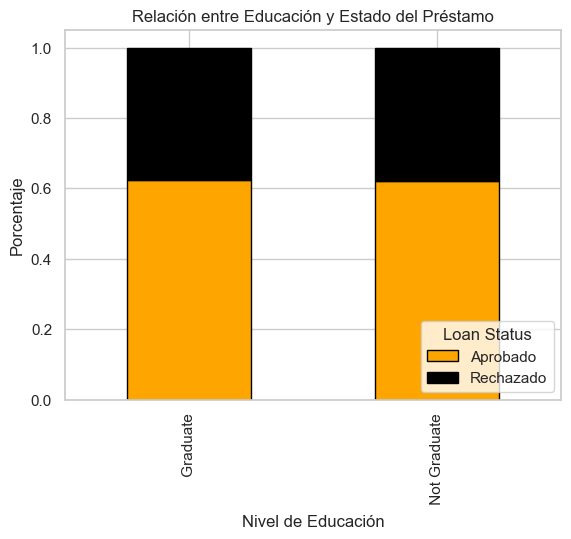

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus datos están en un DataFrame llamado 'df'
# Si aún no has cargado tus datos, puedes hacerlo con pd.read_csv('nombre_del_archivo.csv')

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Contar el número de aprobaciones y rechazos para cada nivel de educación
edu_loan_status = pd.crosstab(df[' education'], df[' loan_status'])

# Normalizar para obtener porcentajes en lugar de recuentos
edu_loan_status = edu_loan_status.div(edu_loan_status.sum(1).astype(float), axis=0)

# Graficar
edu_loan_status.plot(kind='bar', stacked=True, color=['orange', 'black'], edgecolor='black')
plt.title('Relación entre Educación y Estado del Préstamo')
plt.xlabel('Nivel de Educación')
plt.ylabel('Porcentaje')
plt.legend(title='Loan Status', loc='lower right', labels=['Aprobado', 'Rechazado'])
plt.show()


<Figure size 1000x600 with 0 Axes>

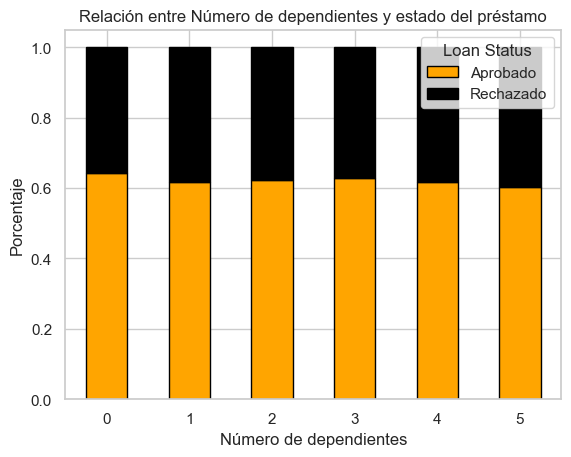

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus datos están en un DataFrame llamado 'df'
# Si aún no has cargado tus datos, puedes hacerlo con pd.read_csv('nombre_del_archivo.csv')

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Contar el número de aprobaciones y rechazos para cada nivel de educación
edu_loan_status = pd.crosstab(df[' no_of_dependents'], df[' loan_status'])

# Normalizar para obtener porcentajes en lugar de recuentos
edu_loan_status = edu_loan_status.div(edu_loan_status.sum(1).astype(float), axis=0)

# Graficar
ax = edu_loan_status.plot(kind='bar', stacked=True, color=['orange', 'black'], edgecolor='black')
plt.title('Relación entre Número de dependientes y estado del préstamo')
plt.xlabel('Número de dependientes')
plt.ylabel('Porcentaje')
plt.legend(title='Loan Status', loc='upper right', labels=['Aprobado', 'Rechazado'])

# Ajustar el ángulo de las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Puedes cambiar el ángulo según tu preferencia

plt.show()


C:\Users\corre\AppData\Local\Temp\ipykernel_29544\1310380381.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=' loan_status', y=' cibil_score', data=df, palette={' Approved': 'orange', ' Rejected': 'black'})


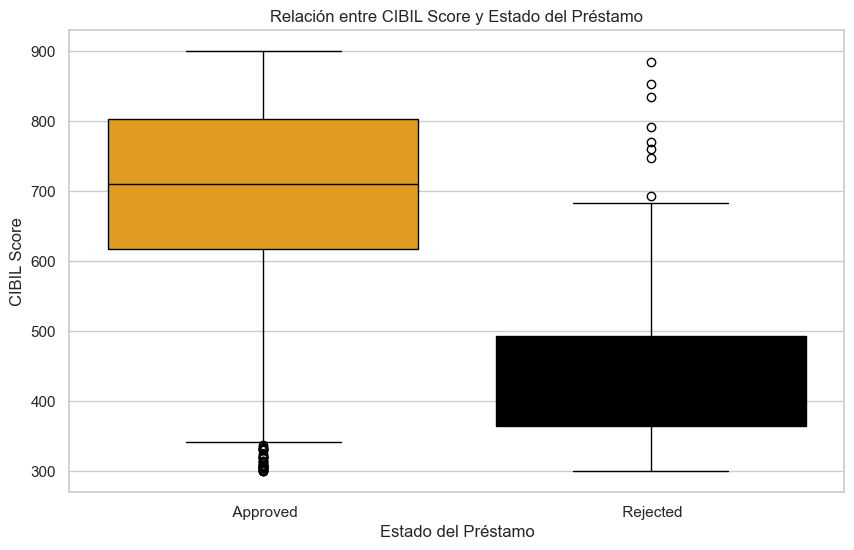

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus datos están en un DataFrame llamado 'df'
# Si aún no has cargado tus datos, puedes hacerlo con pd.read_csv('nombre_del_archivo.csv')

# Crear un gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=' loan_status', y=' cibil_score', data=df, palette={' Approved': 'orange', ' Rejected': 'black'})
plt.title('Relación entre CIBIL Score y Estado del Préstamo')
plt.xlabel('Estado del Préstamo')
plt.ylabel('CIBIL Score')
plt.show()


_________

## 2. Feature Engineering

Voy a bajar un poco los montos de dinero, diviendo las columnas asociadas con dinero por 100

In [4]:
columns_to_divide = [' income_annum', ' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

# Dividir las columnas por 100
df[columns_to_divide] /= 100

In [5]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,96000.0,299000.0,12,778,24000.0,176000.0,227000.0,80000.0,Approved
1,2,0,Not Graduate,Yes,41000.0,122000.0,8,417,27000.0,22000.0,88000.0,33000.0,Rejected
2,3,3,Graduate,No,91000.0,297000.0,20,506,71000.0,45000.0,333000.0,128000.0,Rejected
3,4,3,Graduate,No,82000.0,307000.0,8,467,182000.0,33000.0,233000.0,79000.0,Rejected
4,5,5,Not Graduate,Yes,98000.0,242000.0,20,382,124000.0,82000.0,294000.0,50000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,10000.0,23000.0,12,317,28000.0,5000.0,33000.0,8000.0,Rejected
4265,4266,0,Not Graduate,Yes,33000.0,113000.0,20,559,42000.0,29000.0,110000.0,19000.0,Approved
4266,4267,2,Not Graduate,No,65000.0,239000.0,18,457,12000.0,124000.0,181000.0,73000.0,Rejected
4267,4268,1,Not Graduate,No,41000.0,128000.0,8,780,82000.0,7000.0,141000.0,58000.0,Approved


In [6]:
df[' loan_status'].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [7]:
df[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [8]:
df[' loan_status']=df[' loan_status'].apply(lambda x: 1 if x == " Approved" else 0)

In [9]:
df[' education']=df[' education'].apply(lambda x: 1 if x == " Graduate" else 0)

In [10]:
df[' self_employed']=df[' self_employed'].apply(lambda x: 1 if x == " Yes" else 0)

In [11]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,96000.0,299000.0,12,778,24000.0,176000.0,227000.0,80000.0,1
1,2,0,0,1,41000.0,122000.0,8,417,27000.0,22000.0,88000.0,33000.0,0
2,3,3,1,0,91000.0,297000.0,20,506,71000.0,45000.0,333000.0,128000.0,0
3,4,3,1,0,82000.0,307000.0,8,467,182000.0,33000.0,233000.0,79000.0,0
4,5,5,0,1,98000.0,242000.0,20,382,124000.0,82000.0,294000.0,50000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,10000.0,23000.0,12,317,28000.0,5000.0,33000.0,8000.0,0
4265,4266,0,0,1,33000.0,113000.0,20,559,42000.0,29000.0,110000.0,19000.0,1
4266,4267,2,0,0,65000.0,239000.0,18,457,12000.0,124000.0,181000.0,73000.0,0
4267,4268,1,0,0,41000.0,128000.0,8,780,82000.0,7000.0,141000.0,58000.0,1


<Axes: >

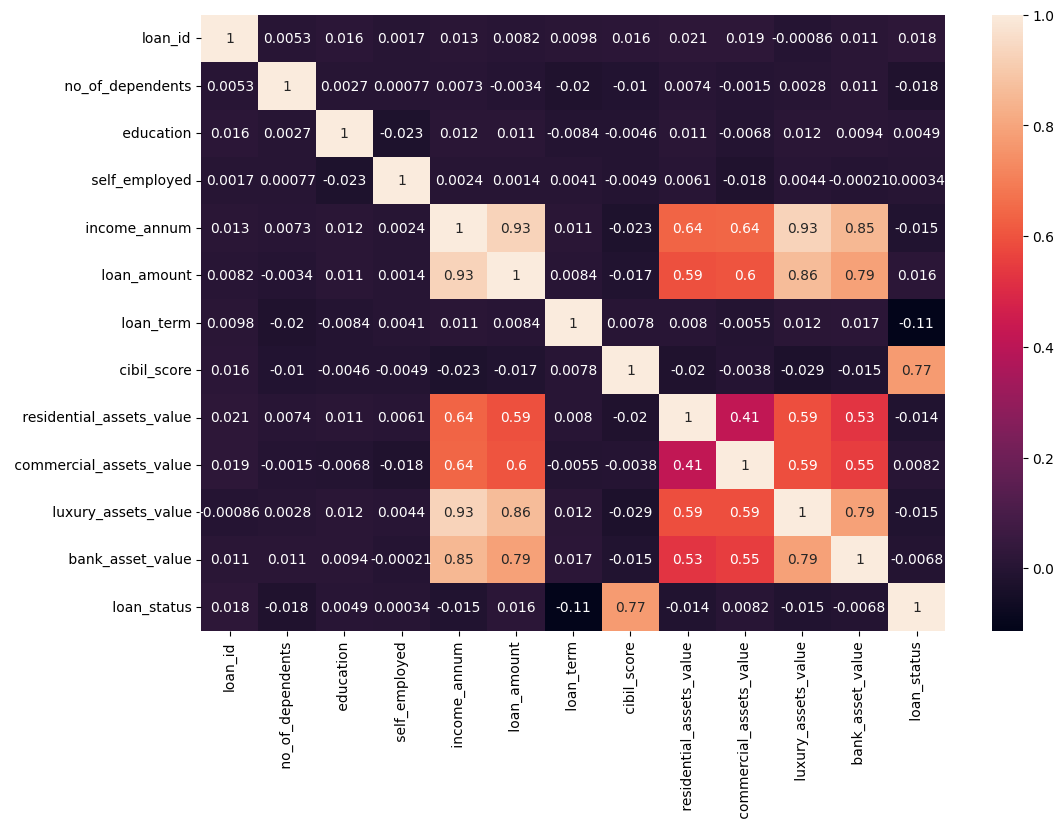

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [13]:
df=df.drop(['loan_id', ' self_employed', ' education', ' commercial_assets_value', ' bank_asset_value'], axis=1)

Estan demasiado poco correlacionados linealmente con el target

___________

## 3. Dividimos los datos

In [14]:
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

In [16]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

______

## 4. Modelos y resultados

### LOGISTICREGRESSION

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

logistic_regression = LogisticRegression()

In [19]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [20]:
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _ch

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [21]:
print("Mejores parámetros:", grid_search.best_params_)
best_model_logistic = grid_search.best_estimator_
print("Mejores modelo:", best_model_logistic)

Mejores parámetros: {'C': 1, 'penalty': 'l2'}
Mejores modelo: LogisticRegression(C=1)


In [22]:
from sklearn.metrics import accuracy_score
y_pred = best_model_logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.914519906323185


In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[280,  38],
       [ 35, 501]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       318
           1       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [26]:
knn_classifier = KNeighborsClassifier()

# Define el espacio de búsqueda de hiperparámetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [27]:
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [28]:
print("Mejores parámetros:", grid_search_knn.best_params_)
best_model_knn = grid_search_knn.best_estimator_
print("Mejores modelo:", best_model_knn)

Mejores parámetros: {'n_neighbors': 9, 'weights': 'distance'}
Mejores modelo: KNeighborsClassifier(n_neighbors=9, weights='distance')


In [29]:
from sklearn.metrics import accuracy_score
y_pred = best_model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9344262295081968


In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[294,  24],
       [ 32, 504]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       318
           1       0.95      0.94      0.95       536

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



### DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

tree_classifier = DecisionTreeClassifier()

param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3]
}

In [33]:
grid_search_tree = GridSearchCV(tree_classifier, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3]},
             scoring='accuracy')

In [35]:
X_train

array([[1.        , 0.79381443, 0.75510204, ..., 0.44666667, 0.20205479,
        0.40102828],
       [0.        , 0.96907216, 0.85969388, ..., 0.68333333, 0.81849315,
        0.97172237],
       [0.2       , 0.06185567, 0.06632653, ..., 0.63666667, 0.07876712,
        0.06683805],
       ...,
       [0.8       , 0.86597938, 0.51785714, ..., 0.24833333, 0.37328767,
        0.73007712],
       [0.4       , 0.70103093, 0.53826531, ..., 0.40166667, 0.13013699,
        0.50128535],
       [0.8       , 0.6185567 , 0.43367347, ..., 0.895     , 0.43493151,
        0.62724936]])

In [36]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model_tree = grid_search_tree.best_estimator_
print("Mejores modelo:", best_model_tree)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 3}
Mejores modelo: DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [37]:
from sklearn.metrics import accuracy_score
y_pred = best_model_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9648711943793911


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[315,   3],
       [ 27, 509]], dtype=int64)

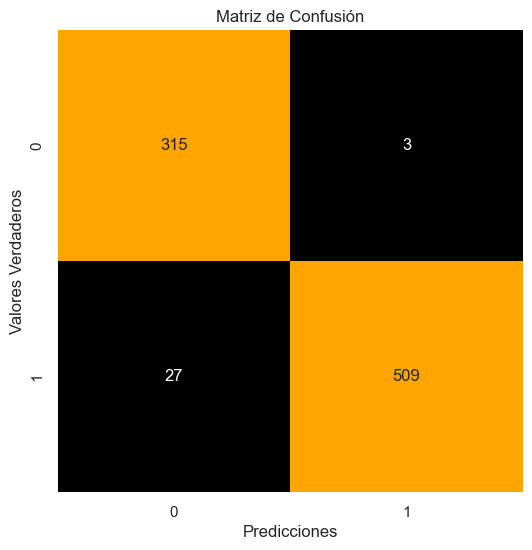

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'y_pred' son las predicciones del modelo y 'y_true' son los verdaderos objetivos
cm = confusion_matrix(y_test, y_pred)

# Define una paleta de colores personalizada (negro y naranja)
colors = sns.color_palette(['black', 'orange'])

# Crea el gráfico de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       318
           1       0.99      0.95      0.97       536

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.97       854



In [40]:
best_model_tree.feature_importances_

array([0.        , 0.        , 0.01159452, 0.13789715, 0.83756068,
       0.01294764, 0.        ])

In [47]:
X.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' luxury_assets_value'],
      dtype='object')

### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

rf_classifier = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [ 3,5,10,15 ],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model_random = grid_search_rf.best_estimator_
print("Mejores modelo:", best_model_random)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: RandomForestClassifier(max_depth=10, min_samples_leaf=2)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = best_model_random.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.977751756440281


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[304,  14],
       [  5, 531]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



### ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

adaboost_classifier = AdaBoostClassifier()

param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [ ]:
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model_ada = grid_search_adaboost.best_estimator_
print("Mejores modelo:", best_model_ada)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: AdaBoostClassifier(n_estimators=150)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = best_model_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9742388758782201


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[304,  14],
       [  8, 528]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



### GRADIENTBOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

gradboost_classifier = GradientBoostingClassifier()

param_grid_gradboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    
}

In [ ]:
grid_search_gradboost = GridSearchCV(gradboost_classifier, param_grid_gradboost, cv=5, scoring='accuracy')
grid_search_gradboost.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model_gradient = grid_search_gradboost.best_estimator_
print("Mejores modelo:", best_model_gradient)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: GradientBoostingClassifier(max_depth=5, n_estimators=150)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = best_model_gradient.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9871194379391101


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[311,   7],
       [  4, 532]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



### XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd


xgb_classifier = xgb.XGBClassifier(n_jobs=-1)

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
    
}

In [ ]:
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_
print("Mejores modelo:", best_model_xgb)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = best_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9824355971896955


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[308,  10],
       [  5, 531]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



___________

## 5. Eleccion del modelo 

Pese a que hay modelos que mejoran un poco las metricas, hemos decidido apostar por el modelo de DecisionTree debido lo facil que se hace visualizar como se clasifican los datos.

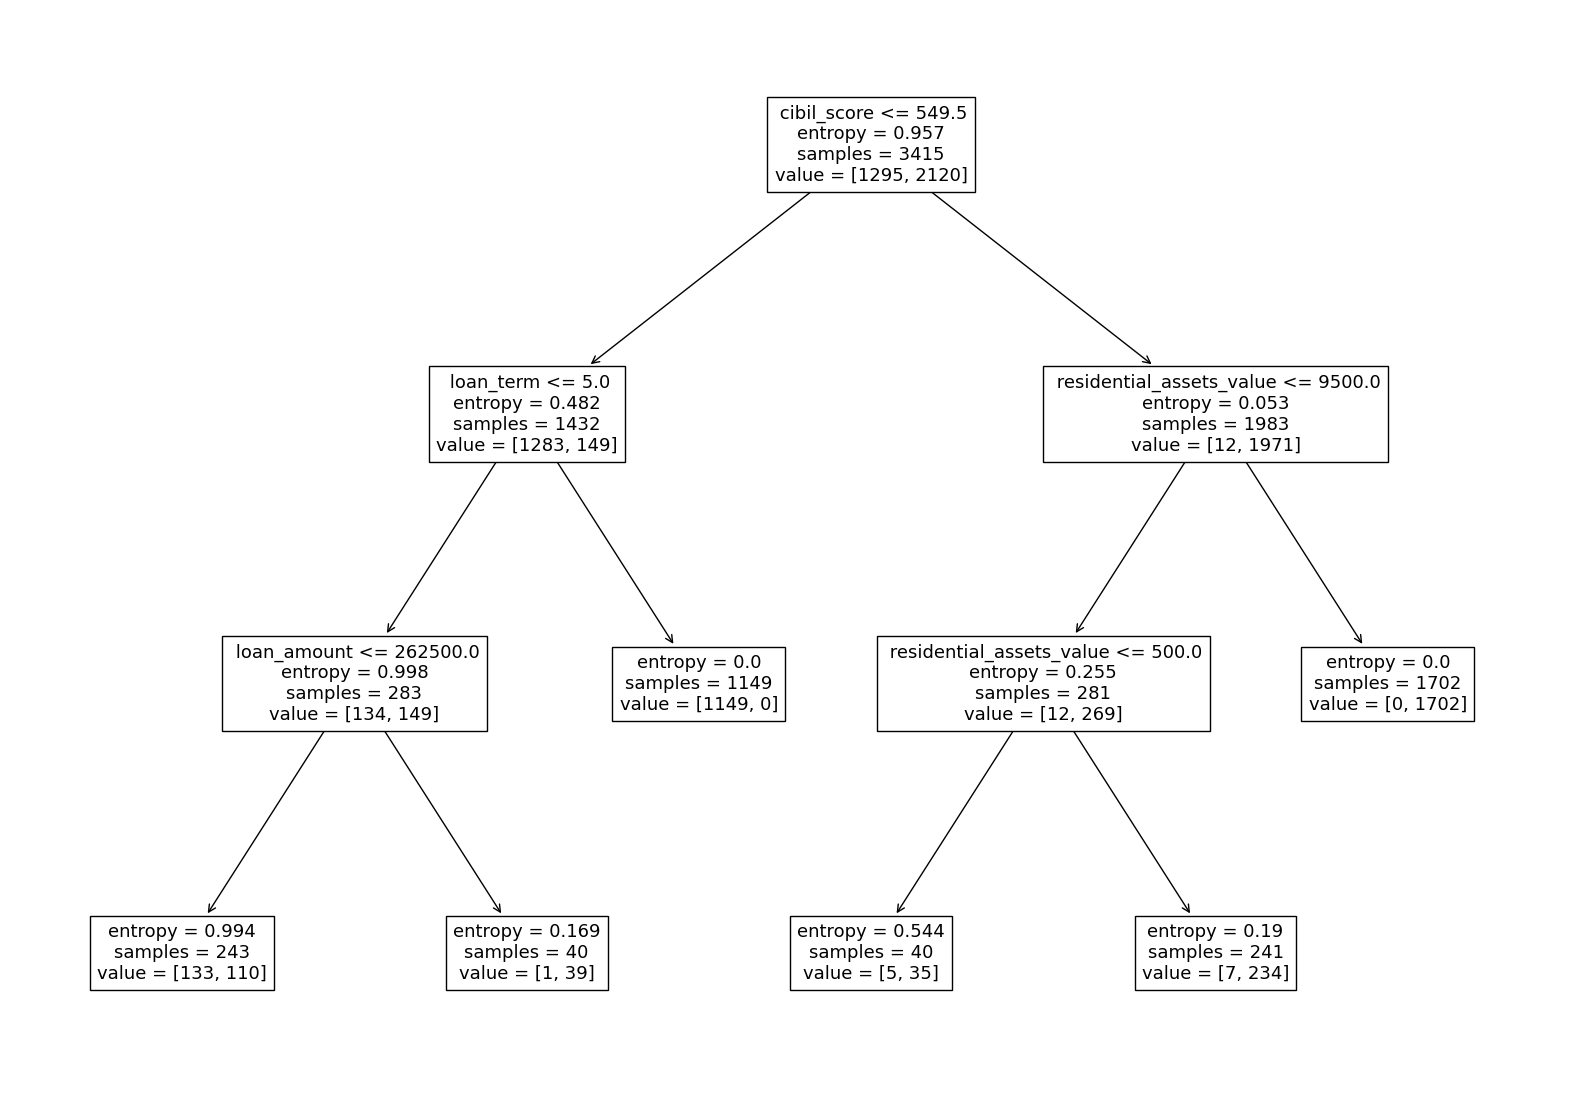

In [ ]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
import sklearn

plt.figure(figsize=(20,14))
sklearn.tree.plot_tree(best_model_tree, feature_names=df.columns);


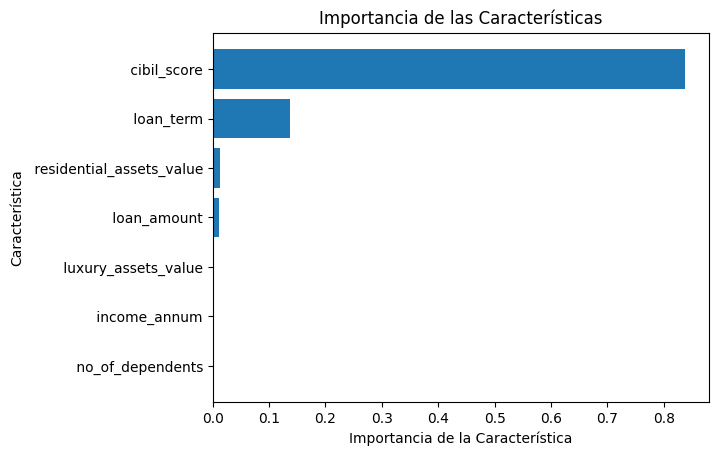

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que best_model es tu modelo entrenado
# Reemplaza esto con tu código actual para entrenar el modelo
# best_model = ...

# Obtén las importancias de las características
feature_importances = best_model_tree.feature_importances_

# Obtén los nombres de las características
feature_names = X.columns

# Ordena las características por su importancia
sorted_idx = np.argsort(feature_importances)

# Crea un gráfico de barras horizontales
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])

plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de las Características')

plt.show()


In [48]:
import joblib
joblib.dump(best_model_tree, 'modelo_arbol_decision.joblib')

['modelo_arbol_decision.joblib']